In [1]:
# Import all necessary Library
import numpy as np
from keras.utils import to_categorical

import glob,os
import cv2 
import math

from scipy.linalg import svd
from numpy import linalg as LA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import os

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Size of the Image we gonna read
dim_img = [50,50]

In [3]:
# Labelizing the dataset
path = glob.glob("D:/ML Dataset/RGB_face_Aug/*.png")

# Rading dataset
X = []
    
for img in path:
    if "RGB" in img:
        n = cv2.imread(img)
        gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray,(dim_img[0],dim_img[1]))
        X.append(gray)

        
path = "D:/ML Dataset/RGB_face_Aug/"

RollNo_No_list = []

for i in os.listdir(path):  
    if "RGB" in i:
        if "2015" in i:
            RollNo_No_list.append(i[0:9])
        else:
            RollNo_No_list.append(i[0:7])
    
    
RollNo_No = set(RollNo_No_list)


RollNo_No = list(RollNo_No)
RollNo_No.sort()

Y = []

for i in os.listdir(path): 
     if "RGB" in i:
        if "2015" in i:
            Y.append(RollNo_No.index(str(i[0:9])))
        else:
            Y.append(RollNo_No.index(str(i[0:7])))
        


In [9]:
# Convert List dataset into array
X = np.array(X)

In [13]:
# Covert Lebel into One hot vector
Y_one_hot = to_categorical(Y)

In [15]:
#Normalizing the dataset
X = X.astype('float32')
X = X / 255

X = X.reshape(-1,dim_img[0],dim_img[1], 1)
X.shape

(4980, 50, 50, 1)

In [16]:
#Dividing the dataset into train, test and validation set
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X, Y_one_hot, test_size=0.1, random_state=13)
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((4482, 50, 50, 1), (498, 50, 50, 1), (4482, 60), (498, 60))

In [17]:
train_X,valid_X,train_Y,valid_Y = train_test_split(train_X, train_Y, test_size=0.15, random_state=13)
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((3809, 50, 50, 1), (673, 50, 50, 1), (3809, 60), (673, 60))

# **Model the Data**

In [20]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [21]:
batch_size = 100
epochs = 10
num_classes = 60

In [28]:
# CNN architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(dim_img[0],dim_img[1],1)))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3, 3), activation='linear',padding='valid'))
#model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(2048, activation='linear'))
#model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.25))
model.add(Dense(1024, activation='linear'))
#model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(128, activation='linear'))
#model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 128)       36992     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 256)         295168    
__________

In [30]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [31]:
# Train the Model
train_dropout = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

Instructions for updating:
Use tf.cast instead.
Train on 3809 samples, validate on 673 samples
Epoch 1/10
3809/3809 [==============================] - 64s 17ms/step - loss: 3.9119 - acc: 0.0662 - val_loss: 3.0801 - val_acc: 0.1724
Epoch 2/10
3809/3809 [==============================] - 60s 16ms/step - loss: 2.2396 - acc: 0.3718 - val_loss: 1.4582 - val_acc: 0.5334
Epoch 3/10
3809/3809 [==============================] - 60s 16ms/step - loss: 1.2276 - acc: 0.6288 - val_loss: 0.4615 - val_acc: 0.8574
Epoch 4/10
3809/3809 [==============================] - 65s 17ms/step - loss: 0.7908 - acc: 0.7595 - val_loss: 0.1834 - val_acc: 0.9569
Epoch 5/10
3809/3809 [==============================] - 65s 17ms/step - loss: 0.5297 - acc: 0.8362 - val_loss: 0.1409 - val_acc: 0.9510
Epoch 6/10
3809/3809 [==============================] - 60s 16ms/step - loss: 0.4879 - acc: 0.8454 - val_loss: 0.1764 - val_acc: 0.9584
Epoch 7/10
3809/3809 [==============================] - 51s 13ms/step - loss: 0.3864 - ac

In [33]:
model.save("CNN_Roll_No_model.h5")

In [34]:
# Test the Model
test_eval = model.evaluate(test_X, test_Y, verbose=1)

498/498 [==============================] - 2s 3ms/step


In [35]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.19090159110964303
Test accuracy: 0.9538152610441767


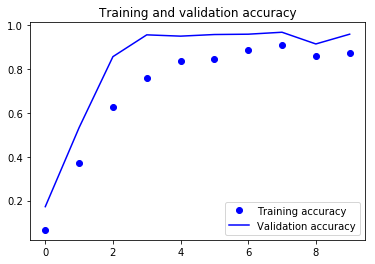

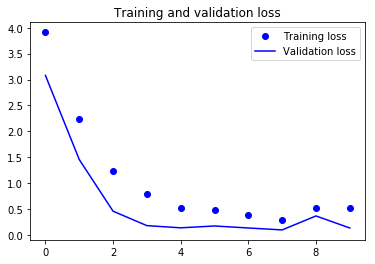

In [36]:
# Result
accuracy = train_dropout.history['acc']
val_accuracy = train_dropout.history['val_acc']
loss = train_dropout.history['loss']
val_loss = train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
predicted_classes = model.predict(test_X)

In [38]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [39]:
test_Y_Pre = np.argmax(np.round(test_Y),axis=1)

In [40]:
predicted_classes.shape, test_Y_Pre.shape

((498,), (498,))

# Predicting Result

Found 473 correct labels


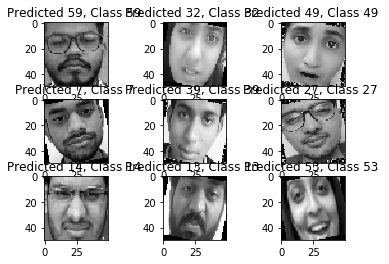

In [41]:
correct = np.where(predicted_classes==test_Y_Pre)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(dim_img[0],dim_img[1]), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {} ".format(predicted_classes[correct], np.argmax(test_Y[correct])))

Found 25 incorrect labels


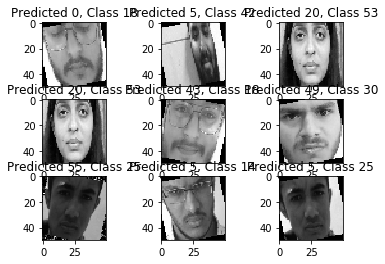

In [42]:
incorrect = np.where(predicted_classes!=test_Y_Pre)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(dim_img[0],dim_img[1]), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], np.argmax(test_Y[incorrect])))


In [43]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y_Pre, predicted_classes, target_names=target_names))
 

              precision    recall  f1-score   support

     Class 0       0.75      1.00      0.86         9
     Class 1       1.00      1.00      1.00         4
     Class 2       1.00      1.00      1.00         6
     Class 3       1.00      1.00      1.00         5
     Class 4       1.00      1.00      1.00         6
     Class 5       0.55      1.00      0.71         6
     Class 6       1.00      1.00      1.00         5
     Class 7       1.00      1.00      1.00         8
     Class 8       1.00      1.00      1.00        12
     Class 9       1.00      1.00      1.00        16
    Class 10       0.83      1.00      0.91        10
    Class 11       1.00      0.88      0.93         8
    Class 12       1.00      1.00      1.00         6
    Class 13       1.00      1.00      1.00         8
    Class 14       0.79      0.85      0.81        13
    Class 15       1.00      1.00      1.00         5
    Class 16       1.00      1.00      1.00        12
    Class 17       1.00    